In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv


In [9]:
import pandas as pd
df=pd.read_csv("/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv",index_col = 0)
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


In [10]:
df[['price','sales_date','number_of_items_sold','total_revenue','sales_time','product_id']]


,price,sales_date,number_of_items_sold,total_revenue,sales_time,product_id
0,80,2022-09-01,18,1440,07:58,1022
1,55,2022-09-01,8,440,12:00,1011
2,285,2022-09-01,15,4275,19:56,1078
3,80,2022-09-01,12,960,09:21,1022
4,55,2022-09-01,16,880,07:22,1011
...,...,...,...,...,...,...
22316,285,2023-11-30,32,9120,08:55,1078
22317,134,2023-11-30,28,3752,19:53,1041
22318,55,2023-11-30,14,770,10:44,1011
22319,350,2023-11-30,8,2800,09:23,1091


In [11]:
df['category'].unique()
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


In [12]:
count = df['category'].value_counts()
print(count)

category
Dairy      13454
Bakery      4531
Grocery     4336
Name: count, dtype: int64


In [13]:
import seaborn as sns


<Axes: xlabel='category'>

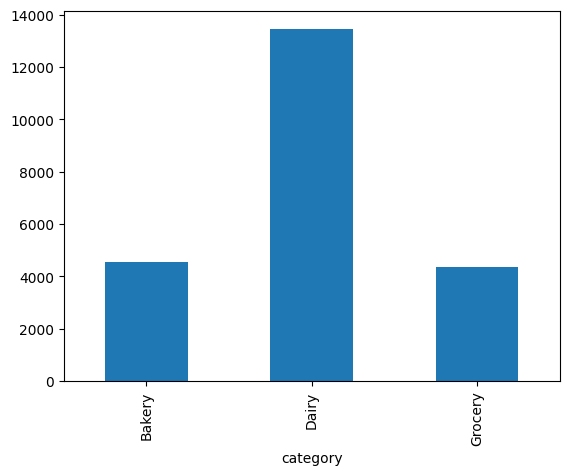

In [14]:
a = df.groupby('category')['product_id'].count()
a.plot(kind = 'bar')

Dairy product have highest selling counts 

<Axes: xlabel='category'>

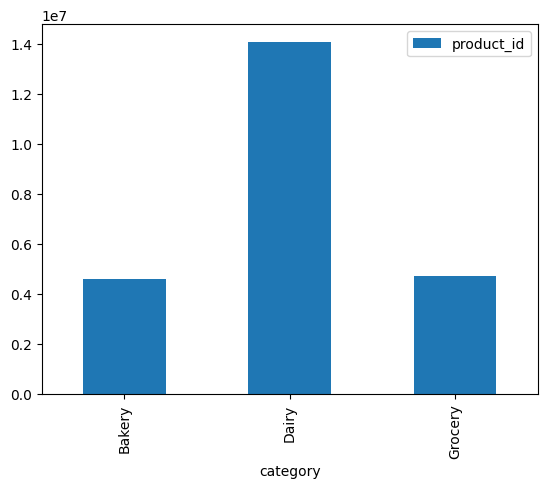

In [15]:
a = df.groupby('category').agg({'product_id':'sum'})
a.plot(kind = 'bar')

<Axes: xlabel='day_of_week'>

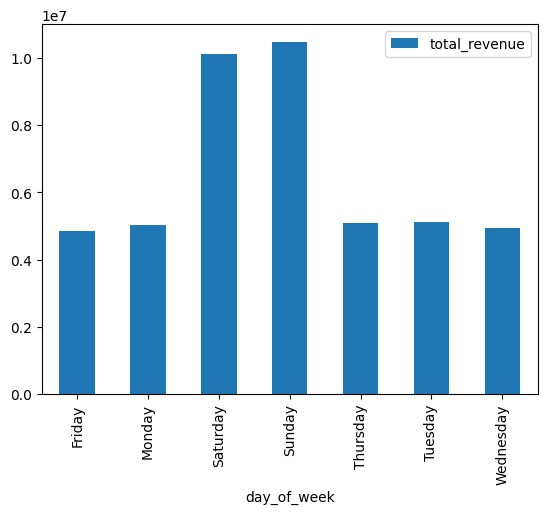

In [16]:
a = df.groupby("day_of_week").agg({'total_revenue':'sum'})
a.plot(kind = 'bar')

on saturday and sunday total_revenue is increased


<Axes: ylabel='Frequency'>

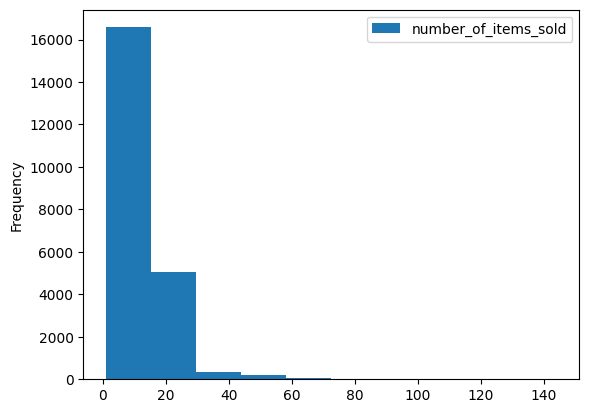

In [17]:
df.plot(x = 'total_revenue',y = 'number_of_items_sold',kind = 'hist')

more than 16000 items sold, Here we observe the frequency of total_revenue

<Axes: ylabel='Density'>

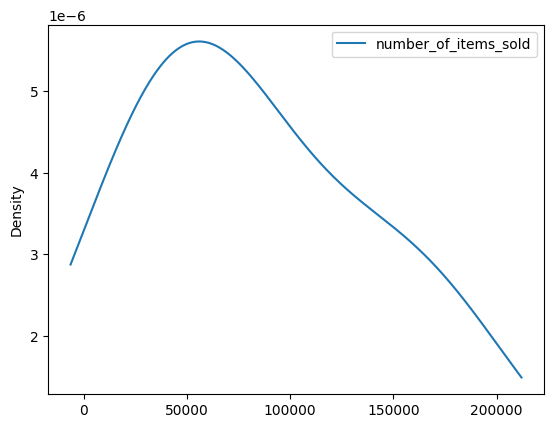

In [18]:
a = df.groupby("category").agg({'number_of_items_sold':'sum'})
a.plot(kind = 'kde')

Density of number_of_items _sold increased at 50000

In [ ]:
a = df.groupby("sales_date")['number_of_items_sold']
a.plot(kind = 'bar')

at 22316 number_of_items_sold is increased

In [ ]:
list(df.select_dtypes('O').columns)

In [ ]:
df[['product_name', 'category', 'day_of_week', 'buyer_gender']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plt.subplot(1,2,1)
sns.barplot(x = df['product_name'].value_counts().index, y = df['product_name'].value_counts().values)
# plt.title('green')
plt.xticks()
plt.show()

In [ ]:
sns.barplot(x = df['category'].value_counts().index, y = df['category'].value_counts().values)

plt.show()

In [ ]:
sns.barplot(x = df['day_of_week'].value_counts().index, y = df['day_of_week'].value_counts().values)
plt.show()

In [ ]:
sns.barplot(x = df['buyer_gender'].value_counts().index, y = df['buyer_gender'].value_counts().values)
plt.show()